<a href="https://colab.research.google.com/github/eleshuk/machine_learning/blob/main/eleshuk_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Create a script to train a regression model to predict the response variable "quality" given the available explanatory variables for the Wine Quality data set (https://archive.ics.uci.edu/dataset/186/wine+quality) that contains 4898 examples.

In [87]:
from google.colab import drive
import pandas as pd
import zipfile
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [88]:
# Mount drive to access zip folder in google drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [90]:
file_path = "/content/drive/My Drive/wine+quality.zip"
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
print(file_list)

['winequality-red.csv', 'winequality-white.csv', 'winequality.names']


In [91]:
zip_path = file_path
extract_to = "wine_quality_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [92]:
# Look at white wine first, that's the dataset that has 4898 examples (later combine red and white or does it make more sense to keep them separate sine maybe indicators of quality are different?)
df = pd.read_csv("wine_quality_data/winequality-white.csv", sep = ';')
# df.head()

In [93]:
# Read metadata file
# with open("wine_quality_data/winequality.names", "r") as file:
#     print(file.read())

predict the response variable "quality" given the available explanatory variables for the Wine Quality data set

In [94]:
# PyTorch expects numeric data in float32 (for continuous data) - we have a pandas df rn bc of the way that we read in the data

# Define features (X) and target (y)
features = df.drop(columns=["quality"])  # Drop target variable
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

y_df = df["quality"]  # Target variable

In [95]:
# Convert features to a PyTorch tensor
X = torch.tensor(X_scaled.astype(np.float32))
y = torch.tensor(y_df.astype(np.float32))
y = y.view(y.shape[0], 1)

In [96]:
# Samples - samples within the dataset
# Features - 11

# Define number of samples and features
n_samples, n_features = X.shape
# input size - number of features (11)
# output size - quality (1)

In [97]:
# Linear model f = wx + b
input_size = n_features
output_size = 1 # (quality)
model = nn.Linear(input_size, output_size)
model

Linear(in_features=11, out_features=1, bias=True)

In [99]:
# Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [100]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):

    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 26.2033
epoch: 20, loss = 17.6949
epoch: 30, loss = 12.0143
epoch: 40, loss = 8.2209
epoch: 50, loss = 5.6870
epoch: 60, loss = 3.9941
epoch: 70, loss = 2.8627
epoch: 80, loss = 2.1064
epoch: 90, loss = 1.6005
epoch: 100, loss = 1.2620


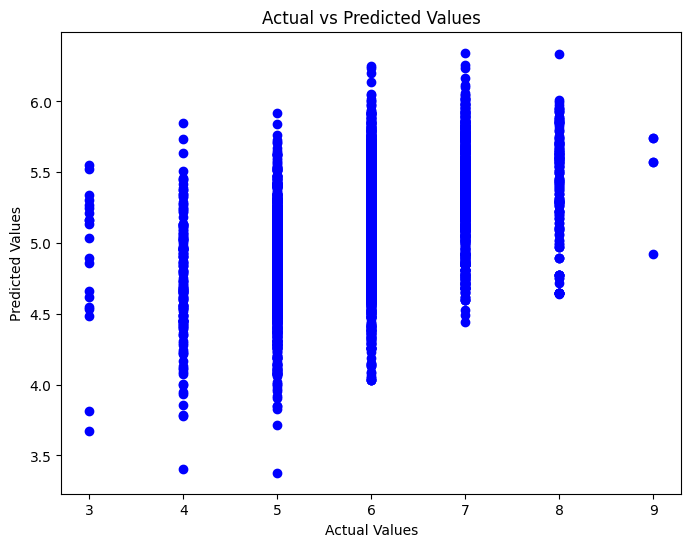

In [101]:
predicted = model(X).detach().numpy()
plt.figure(figsize=(8,6))
plt.scatter(y, predicted, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
# plt.ylim(0)
plt.show()

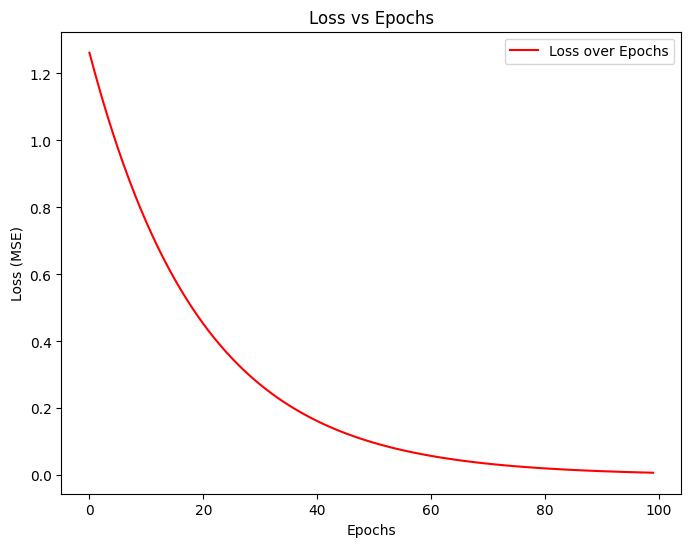

In [105]:
# Simulate loss reduction over epochs
epochs = 100

# Simulating loss decrease
loss_history = [loss * (0.95 ** epoch) for epoch in range(epochs)]

# Plot Loss vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), torch.tensor(loss_history), label="Loss over Epochs", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()